In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model

In [21]:
%matplotlib inline

sns.set_style('darkgrid')

In [3]:
df = pd.read_csv('data/streeteasy.csv')
df.head()

,rental_id,building_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood,submarket,borough
0,1545,44518357,2550,0.0,1,480,9,2.0,17,1,1,0,0,1,1,0,1,Upper East Side,All Upper East Side,Manhattan
1,2472,94441623,11500,2.0,2,2000,4,1.0,96,0,0,0,0,0,0,0,0,Greenwich Village,All Downtown,Manhattan
2,10234,87632265,3000,3.0,1,1000,4,1.0,106,0,0,0,0,0,0,0,0,Astoria,Northwest Queens,Queens
3,2919,76909719,4500,1.0,1,916,2,51.0,29,0,1,0,1,1,1,0,0,Midtown,All Midtown,Manhattan
4,2790,92953520,4795,1.0,1,975,3,8.0,31,0,0,0,1,1,1,0,1,Greenwich Village,All Downtown,Manhattan


<Figure size 1000x600 with 0 Axes>

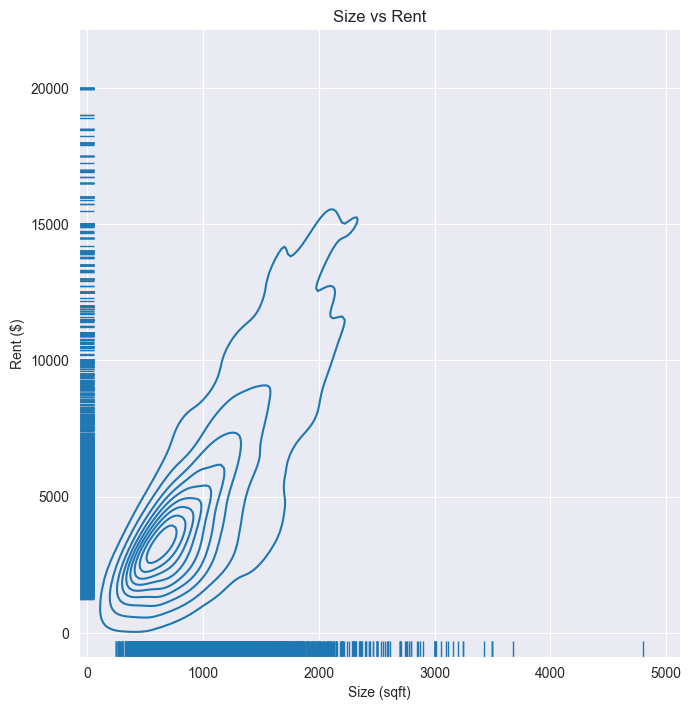

In [25]:
plt.figure(figsize=(10, 6))

sns.displot(
    df,
    x='size_sqft',
    y='rent',
    rug=True,
    height=7,
    kind='kde',
)

plt.title('Size vs Rent')
plt.xlabel('Size (sqft)')
plt.ylabel('Rent ($)')
plt.show()

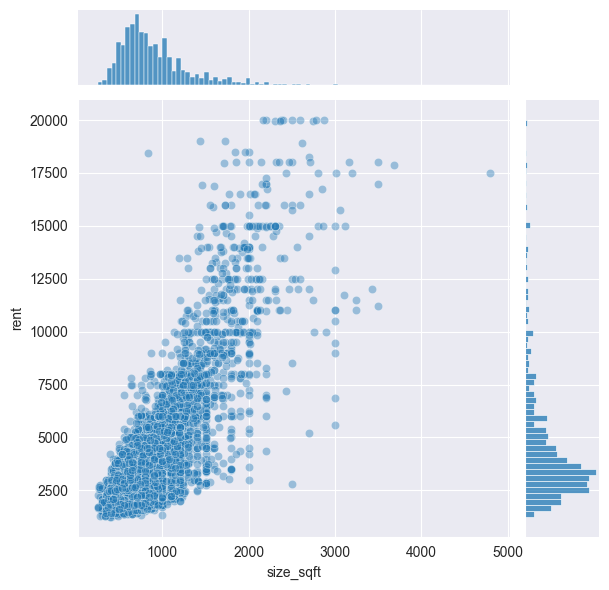

In [28]:
sns.jointplot(
    data=df,
    x='size_sqft',
    y='rent',
    alpha=.4
)

In [29]:
regr = linear_model.LinearRegression()
regr.fit(df[['size_sqft']], df['rent'])

LinearRegression()

In [38]:
y_pred = regr.predict(df[['size_sqft']])
print('Coefficients: ', regr.coef_)
print('Intercept: ', regr.intercept_)

Coefficients:  [5.38362586]
Intercept:  -416.56089379599507


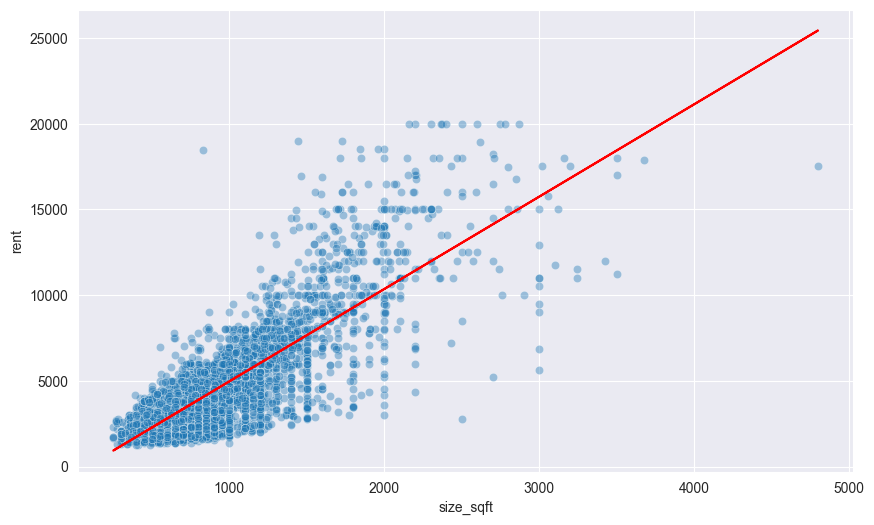

In [39]:
plt.figure(figsize=(10, 6))

sns.scatterplot(
    data=df,
    x='size_sqft',
    y='rent',
    alpha=.4
)

plt.plot(
    df.size_sqft,
    y_pred,
    color='red',
    # linewidth=2
)

In [40]:
regr.score(df[['size_sqft']], df['rent'])

0.6541307596841424

In [43]:
regr.predict([[4000]])

c:\Users\erik1\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([21117.94255896])